In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [76]:
dt = [('L', int),('size', float), ('SD', float)]
L = np.array([20, 40, 80,100, 160, 200, 240, 300])

In [63]:
l_20 = np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\Calcs\\Replics\\24.txt', dtype=dt)
l_40 = np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\Calcs\\Replics\\44.txt', dtype=dt)
l_80 = np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\Calcs\\Replics\\84.txt', dtype=dt)
l_100 = np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\Calcs\\Replics\\104.txt', dtype=dt)
l_160 = np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\Calcs\\Replics\\164.txt', dtype=dt)
l_200 = np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\Calcs\\Replics\\204.txt', dtype=dt)
l_240 = np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\Calcs\\Replics\\244.txt', dtype=dt)
l_300 = np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\Calcs\\Replics\\304.txt', dtype=dt)

In [65]:
#Массивы с размерами границы с учетом нулей и без, а также массив значений корней из дисперсий
l_20_z = np.array(l_20['size'])
l_20_nz = np.array(l_20['size'][l_20['size'] !=0.])
l_20_var = np.array(l_20['SD'])
l_40_z = np.array(l_40['size'])
l_40_nz = np.array(l_40['size'][l_40['size'] !=0.])
l_40_var = np.array(l_40['SD'])
l_80_z = np.array(l_80['size'])
l_80_nz = np.array(l_80['size'][l_80['size'] !=0.])
l_80_var = np.array(l_80['SD'])
l_100_z = np.array(l_100['size'])
l_100_nz = np.array(l_100['size'][l_100['size'] !=0.])
l_100_var = np.array(l_100['SD'])
l_160_z = np.array(l_160['size'])
l_160_nz = np.array(l_160['size'][l_160['size'] !=0.])
l_160_var = np.array(l_160['SD'])
l_200_z = np.array(l_200['size'])
l_200_nz = np.array(l_200['size'][l_200['size'] !=0.])
l_200_var = np.array(l_200['SD'])
l_240_z = np.array(l_240['size'])
l_240_nz = np.array(l_240['size'][l_240['size'] !=0.])
l_240_var = np.array(l_240['SD'])
l_300_z = np.array(l_300['size'])
l_300_nz = np.array(l_300['size'][l_300['size'] !=0.])
l_300_var = np.array(l_300['SD'])

In [71]:
L_z = np.array([np.mean(l_20_z), np.mean(l_40_z),np.mean(l_80_z),np.mean(l_100_z),np.mean(l_160_z),np.mean(l_200_z),np.mean(l_240_z),np.mean(l_300_z)])
L_nz = np.array([np.mean(l_20_nz), np.mean(l_40_nz),np.mean(l_80_nz),np.mean(l_100_nz),np.mean(l_160_nz),np.mean(l_200_nz),np.mean(l_240_nz),np.mean(l_300_nz)])
SD_z = np.array([np.sqrt(np.sum(l_20_var*l_20_var)/50),
                 np.sqrt(np.sum(l_40_var*l_40_var)/50),
                 np.sqrt(np.sum(l_80_var*l_80_var)/50),
                 np.sqrt(np.sum(l_100_var*l_100_var)/50),
                 np.sqrt(np.sum(l_160_var*l_160_var)/50),
                 np.sqrt(np.sum(l_200_var*l_200_var)/50),
                 np.sqrt(np.sum(l_240_var*l_240_var)/50),
                 np.sqrt(np.sum(l_300_var*l_300_var)/50)])
SD_nz = np.array([np.sqrt(np.sum(l_20_var*l_20_var)/l_20_nz.size),
                 np.sqrt(np.sum(l_40_var*l_40_var)/l_40_nz.size),
                 np.sqrt(np.sum(l_80_var*l_80_var)/l_80_nz.size),
                 np.sqrt(np.sum(l_100_var*l_100_var)/l_100_nz.size),
                 np.sqrt(np.sum(l_160_var*l_160_var)/l_160_nz.size),
                 np.sqrt(np.sum(l_200_var*l_200_var)/l_200_nz.size),
                 np.sqrt(np.sum(l_240_var*l_240_var)/l_240_nz.size),
                 np.sqrt(np.sum(l_300_var*l_300_var)/l_300_nz.size)])

<IPython.core.display.Javascript object>


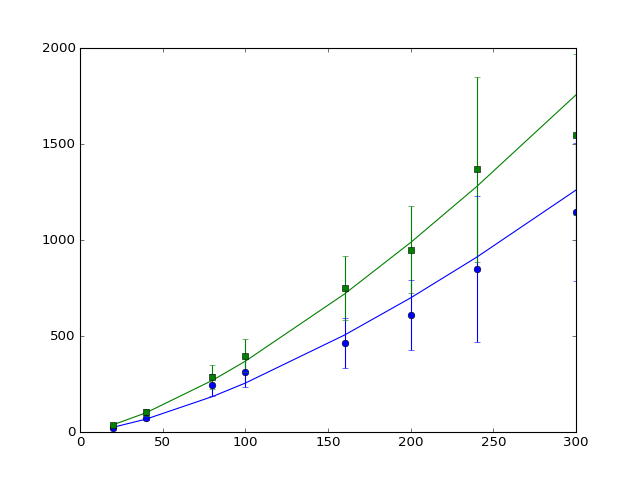

In [95]:
def f(a,b, x):
    return a*x**b

fig, ax = plt.subplots()
ax.plot(L, f(0.3139472 ,  1.45473323, L), 'b-')
ax.plot(L, f(0.53153912,  1.42058528, L), 'g-')
ax.errorbar(L, L_z, yerr=SD_z, fmt='o')
ax.errorbar(L, L_nz, yerr=SD_nz, fmt='s')
plt.show()

In [33]:
from scipy.optimize import curve_fit

In [80]:
curve_fit(f=lambda x, a, b: a*x**b, xdata=L, ydata=L_z, sigma=SD_z, absolute_sigma=True)

(array([ 0.3139472 ,  1.45473323]), array([[ 0.01977338, -0.01368544],
        [-0.01368544,  0.00990227]]))

In [81]:
curve_fit(f=lambda x, a, b: a*x**b, xdata=L, ydata=L_nz, sigma=SD_nz, absolute_sigma=True)

(array([ 0.53153912,  1.42058528]), array([[ 0.04099695, -0.0169015 ],
        [-0.0169015 ,  0.00726748]]))

In [87]:
plt.plot?